<a href="https://colab.research.google.com/github/chrispydocodes/Prediction-of-Project-Sales/blob/main/Project_1_Chris_Do.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Prediction of Product Sales
### Author: Chris Do

# Project Overview

- This project serves as a sales prediction for food items sold at various stores. 
- The goal of this is to help the retailer understand the properties of products and outlets that play crucial roles in increasing sales.

# Load and Inspect Data

- Download the data [here](https://drive.google.com/file/d/1syH81TVrbBsdymLT_jl2JIf6IjPXtSQw/view), then import the necessary libraries in order to load and manipulate it.

First, we're going to import Pandas in order to load our data as a DataFrame.

In [1]:
import pandas as pd

Next, we define our data's file path as `filename`.

In [2]:
filename = '/content/sales_predictions.csv'

Then, we create a DataFrame with `pd.read_csv()` and name it `df`.

In [3]:
df = pd.read_csv(filename)

Now, we will view our DataFrame's info and its first 5 entries.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [5]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


# Clean Data

Let's go through our data and clean it up so we have a better time understanding and using it.

## Data Dictionary

- `Item_Identifier`:	Unique product ID
- `Item_Weight`:	Weight of product
- `Item_Fat_Content`:	Whether the product is low fat or regular
- `Item_Visibility`: The percentage of total display area of all products in a store allocated to the particular product
- `Item_Type`:	The category to which the product belongs
- `Item_MRP`:	Maximum Retail Price (list price) of the product
- `Outlet_Identifier`:	Unique store ID
- `Outlet_Establishment_Year`:	The year in which store was established
- `Outlet_Size`:	The size of the store in terms of ground area covered
- `Outlet_Location_Type`:	The type of area in which the store is located
- `Outlet_Type`:	Whether the outlet is a grocery store or some sort of supermarket
- `Item_Outlet_Sales`:	Sales of the product in the particular store. This is the target variable to be predicted.

## Rows and Columns


Adding the `.shape` attribute in front of out DataFrame tells us its number of dimensions, as well as the number of items for each dimension.

In [6]:
df.shape

(8523, 12)

- Our DataFrame has 8523 rows (entries) under 12 columns

## Variable Datatypes

We can use the `.dtypes` attribute to view the datatype of each variable in our DataFrame.

In [7]:
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

- Our DataFrame includes objects, floats, and integers as variables.

## Duplicate Entries

The `.duplicated()` method will check for duplicate values in our DataFrame, returning either `True` or `False` for each entry. We can also use the `.sum()` method to return the total number of `True` (duplicate) values rather than checking each row ourselves.

In [8]:
df.duplicated().sum()

0

- Thankfully, we don't have to worry about any duplicate entries in our data.

## Missing Values

The `.isna()` method checks for null/missing values in each entry. Again, we will add `.sum()` to return a total number of missing values.

In [9]:
df.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

- Our data is missing 1463 `Item_Weight` values and 2410 `Outlet_Size` values


## Addressing Missing Values

### Item Weight
Item weight can be important in predicting its sales, so we'll need at least an estimated weight for each item.
- We'll impute our missing weight values with the average weight of the rest of our items.

We can calculate the mean of the `Item_Weight` column with `.mean()`, then round the result with `.round()`. 

Then, we'll save this as a new variable named `mean_weight`.

In [10]:
mean_weight = df['Item_Weight'].mean().round(2)
mean_weight

12.86

The `.fillna()` method fills in missing values. Adding the `inplace=True` argument overwrites our DataFrame.

In [11]:
df['Item_Weight'].fillna(mean_weight, inplace=True)

### Outlet Size
Let's impute our missing `Outlet_Size` values with a new category, `Missing`. This allows us to continue using the rest of the data from the column.

In [21]:
df['Outlet_Size'].fillna('Missing', inplace=True)

## Double Checking for Missing Values

In [22]:
df.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

- We have no missing values left in our data.

## Inconsistent Categories/Entries

Let's check our columns for inconsistent entries, using [Data Dictionary](https://colab.research.google.com/drive/1klPeDMEXBdHBcPrabNwKmDhXwXUw6cWY#scrollTo=dIWlYKjHI4NO) for reference as to which categories should be under each column.

First, we get a list of our column datatypes.

In [14]:
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

The `.value_counts()` method returns the unique values of each column.

### Item Fat Content

In [15]:
df['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

There should only be `Low Fat` or `Regular` values, so we'll replace `LF`,`reg`, and `low fat` using the `.replace()` method.

In [16]:
df['Item_Fat_Content'].replace('LF','Low Fat',inplace=True)
df['Item_Fat_Content'].replace('low fat','Low Fat',inplace=True)
df['Item_Fat_Content'].replace('reg','Regular',inplace=True)
df['Item_Fat_Content'].value_counts()


Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

### Item Type

In [17]:
df['Item_Type'].value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

### Outlet Location Type

In [18]:
df['Outlet_Location_Type'].value_counts()

Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

### Outlet Type

In [19]:
df['Outlet_Type'].value_counts()

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

## Summary Statistics of Numerical Columns
Using `.describe()` is an easy way to obtain multiple statistics from numerical columns.
- We'll add `.round()` to round everything to 2 decimal points.

In [20]:
df.describe().round(2)

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.00,8523.00,8523.00,8523.00,8523.00
mean,12.86,0.07,140.99,1997.83,2181.29
std,4.23,0.05,62.28,8.37,1706.50
min,4.56,0.00,31.29,1985.00,33.29
25%,9.31,0.03,93.83,1987.00,834.25
50%,12.86,0.05,143.01,1999.00,1794.33
75%,16.00,0.09,185.64,2004.00,3101.30
max,21.35,0.33,266.89,2009.00,13086.96


# Exploratory Data Analysis
Now it's time to complete some statistical analyses in order to help us understand, explain, or model with our data. 

## Histogram

### Distribution of Item Weights
We can use Matplotlib to create a histogram to give us some insight on the different item weights in our data. 

Let's start by importing Matplotlib as its common alias, `plt`.


In [29]:
import matplotlib.pyplot as plt

We'll start by using `.hist()` on our `Item_Weight` column, and saving it as `ax_hist`.
- Adding `bins='auto` lets Matplotlib and Pandas figure out the ideal number of bins for our histogram.
- Adding `edgecolor='black'` creates a black outline around the bins.
- We can add a title with `.set_title()`
- We can label our x-axis and y-axis with `.set_xlabel()` and `.set_ylabel()`.

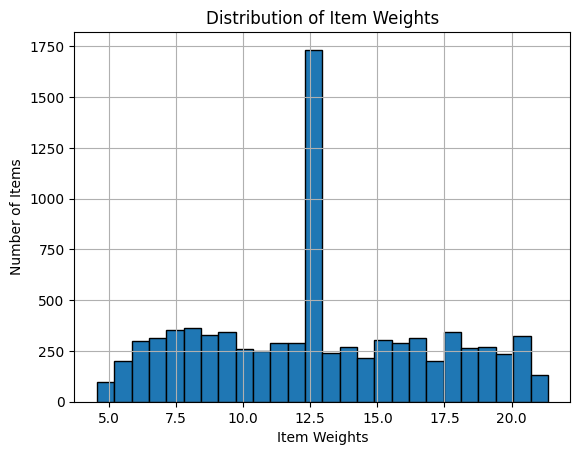

In [27]:
ax_hist = df['Item_Weight'].hist(bins='auto', edgecolor='black')
ax_hist.set_title('Distribution of Item Weights')
ax_hist.set_xlabel('Item Weights')
ax_hist.set_ylabel('Number of Items');

- The resulting histogram shows us that our item weights are pretty evenly distributed, except for around the 12.5 value range.
  - This is because we imputed 1463 missing weight values with 12.86, the average value of the rest of the weights.

### Distribution of Item Prices
We can also create a histogram to show the distribution of item sales.
- We will use the same method as above, but for the `Item_Outlet_Sales` column.


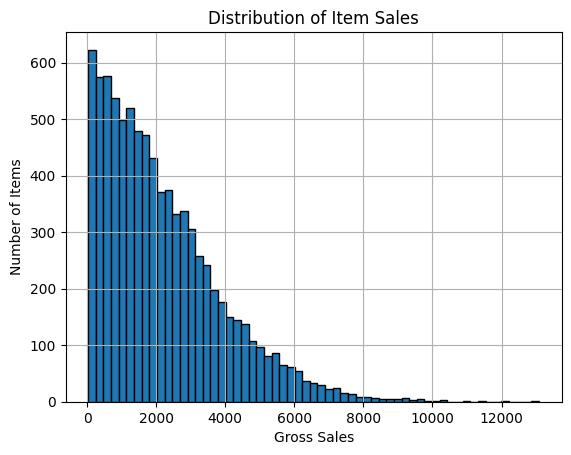

In [40]:
ax_hist2 = df['Item_Outlet_Sales'].hist(bins='auto', edgecolor='black')
ax_hist2.set_title('Distribution of Item Sales')
ax_hist2.set_xlabel('Gross Sales')
ax_hist2.set_ylabel('Number of Items');

- The resulting histogram shows us that the majority of product sales were in the 0-2000 range.

## Boxplot
We can use Seaborn to create boxplots in order to visualize the distribution of data based on a statistical summary.
- (similar to the one we can get from `.describe()`)

We'll start by importing Seaborn as its common alias, `sns`.

In [31]:
import seaborn as sns

Then we, can begin creating our boxplot with `sns.boxplot()` and defining it as ax_box.
- We'll add our entire DataFrame as the `data` argument.
- We'll set our `Item_Outlet_Sales` as our x-variable.
- We'll set our `Outlet_Type` as our y-variable.
  - Normally, we'd have these swapped but in this case we want our box plot to be horizontal so it's easier to view.
- Then, we'll set the title with `.set_title()`.

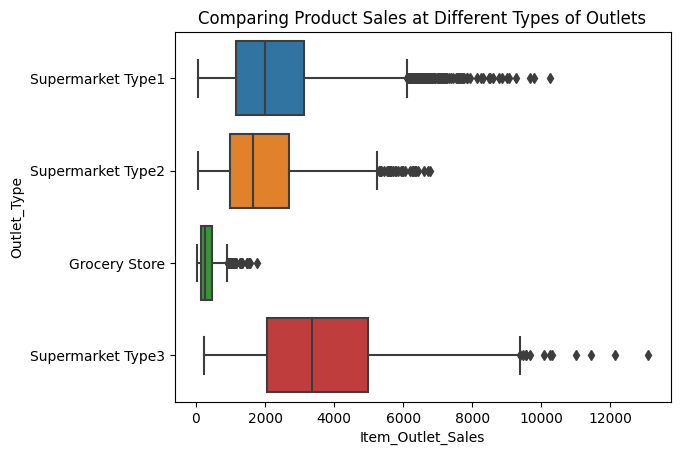

In [35]:
ax_box = sns.boxplot(data=df, x='Item_Outlet_Sales', y='Outlet_Type')
ax_box.set_title('Comparing Product Sales at Different Types of Outlets');

- The resulting boxplot shows us that grocery stores have the smallest range of product sales, and tend to have lower product sales than supermarkets.
- Product sales seem to do the best in type 3 supermarkets.

## Heat Map
Heat maps help us visualize correlation coefficients between numerical features of data.

### Calculating Correlation Coefficients
We must start by using `.corr()` to calculate correlation coefficients between features of our DataFrame.
- Unrelated variables will have a coefficient of `0`.
- Positively related variables will have a positive coefficient up to `1`.
- Negatively related variables will have a negative coefficient up to `-1`.

We can only check coefficients for numerical features, so columns with an object datatype cannot be included.

In [38]:
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

We're able to check the correlation coefficients in the `Item_Weight`, `Item_Visibility`, `Item_MRP`, `Outlet_Establishment_Year`, and `Item_Outlet_Sales` columns.

In [43]:
corr = df[['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Outlet_Establishment_Year', 'Item_Outlet_Sales']].corr()

Now, we'll create our heatmap with `sns.heatmap()`.
- We can assign a color to our heatmap with the `cmap` argument.
- We can make the coefficient values visible with the `annot=True` argument.

<Axes: >

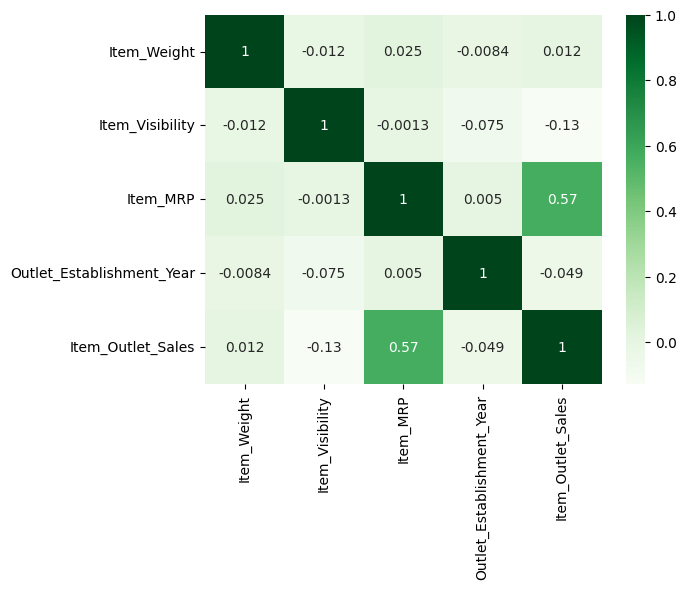

In [44]:
sns.heatmap(corr, cmap='Greens', annot=True)

The only features that have a correlation are item prices and item sales, with a moderate correlation of 0.57.

# Explanatory Data Analysis